In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

from prepareDF import PrepareDF

In [2]:
MovieData = PrepareDF()
MovieData.head()

,title,director,cast,rating,genres
0,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",7.0,"[Dramas, Independent Movies, International Mov..."
1,The Great British Baking Show,Andy Devonshire,"[Mel Giedroyc, Sue Perkins, Mary Berry, Paul H...",8.6,"[British TV Shows, Reality TV]"
2,The Starling,Theodore Melfi,"[Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...",6.4,"[Comedies, Dramas]"
3,Je Suis Karl,Christian Schwochow,"[Luna Wedler, Jannis Niewöhner, Milan Peschel,...",5.5,"[Dramas, International Movies]"
4,Grown Ups,Dennis Dugan,"[Adam Sandler, Kevin James, Chris Rock, David ...",6.0,[Comedies]


In [3]:
#MovieData.to_csv('test1.csv', index = False)

In [4]:
#print(isinstance(MovieData['cast'].iloc[0],list))

In [5]:
def takeN(series, n):
    isList = isinstance(series.iloc[0],list)
    for i in range(len(series.index)):
        if(isList):
            values = series.iloc[i]
            values = values[:n]
            series.at[i] = values
    
    return series

In [6]:
MovieData['cast'] = takeN(MovieData['cast'], 3) 
MovieData['genres'] = takeN(MovieData['genres'], 3)

MovieData.head()

,title,director,cast,rating,genres
0,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",7.0,"[Dramas, Independent Movies, International Mov..."
1,The Great British Baking Show,Andy Devonshire,"[Mel Giedroyc, Sue Perkins, Mary Berry]",8.6,"[British TV Shows, Reality TV]"
2,The Starling,Theodore Melfi,"[Melissa McCarthy, Chris O'Dowd, Kevin Kline]",6.4,"[Comedies, Dramas]"
3,Je Suis Karl,Christian Schwochow,"[Luna Wedler, Jannis Niewöhner, Milan Peschel]",5.5,"[Dramas, International Movies]"
4,Grown Ups,Dennis Dugan,"[Adam Sandler, Kevin James, Chris Rock]",6.0,[Comedies]


In [7]:
print(MovieData.shape)
#MovieData.to_csv('test2.csv', index = False)

(4956, 5)


In [8]:
MovieData['director'] = MovieData['director'].str.replace(', ',',')
MovieData['director'] = MovieData['director'].str.split(',')

In [9]:
def lst(series):
    lst = ''
    lst = list(lst)
    for i in range(len(series.index)):
        if (isinstance(series.iloc[i],list)):
            values = series.iloc[i]
            for value in values:
                if value not in lst:
                    lst.append(value)
        else: 
            value = series.iloc[i]
            if value not in lst:
                lst.append(value)  
    return lst

In [10]:
directorlst = lst(MovieData['director'])
#directorlst
castlst = lst(MovieData['cast'])
#castlst
genrelst = lst(MovieData['genres'])
#genrelst

In [11]:
print(len(directorlst),len(castlst))

4068 8635


In [12]:
def freq(lstname, series):
    
    thisdict ={} 
    for item in lstname:
        count = 0
        #count = series.groupby(item).count
        for i in range(len(series.index)):
            if(isinstance(series.iloc[i],list)):
                values = series.iloc[i]
                for value in values:
                    if(item == value):
                        count += 1
            else:
                value = series.iloc[i]
                if(item == value):
                    count += 1
            thisdict.update({item : count})
    return  thisdict 

In [13]:
direct_freq = freq(directorlst, MovieData['director'])

direct_freq = dict(sorted(direct_freq.items(), key = lambda item : item[1] , reverse = True))
                   
direct_freq

{'Marcus Raboy': 14,
 'Jay Karas': 14,
 'Cathy Garcia-Molina': 13,
 'Martin Scorsese': 12,
 'Jay Chapman': 12,
 'Steven Spielberg': 11,
 'Youssef Chahine': 11,
 'Don Michael Paul': 10,
 'Jan Suter': 10,
 'David Dhawan': 9,
 'Shannon Hartman': 9,
 'Raúl Campos': 9,
 'Robert Rodriguez': 8,
 'Yılmaz Erdoğan': 8,
 'Hanung Bramantyo': 8,
 'Troy Miller': 8,
 'Anurag Kashyap': 8,
 'Justin G. Dyck': 8,
 'Johnnie To': 8,
 'Umesh Mehra': 8,
 'Lasse Hallström': 7,
 'Priyadarshan': 7,
 'Clint Eastwood': 7,
 'Quentin Tarantino': 7,
 'McG': 7,
 'Hakan Algül': 7,
 'Ron Howard': 7,
 'Leslie Small': 7,
 'Noah Baumbach': 7,
 'Ryan Polito': 7,
 'Toshiya Shinohara': 6,
 'Dibakar Banerjee': 6,
 'Steve Brill': 6,
 'David Fincher': 6,
 'Michael Simon': 6,
 'Kevin Smith': 6,
 'Ashutosh Gowariker': 6,
 'Mae Czarina Cruz': 6,
 'Rajkumar Santoshi': 6,
 'Imtiaz Ali': 6,
 'Jesse V. Johnson': 6,
 'Karan Johar': 6,
 'Zoya Akhtar': 6,
 'Sameh Abdulaziz': 6,
 'Lance Bangs': 6,
 'Steven Soderbergh': 6,
 'Rocky Soraya':

In [14]:
cast_freq = freq(castlst, MovieData['cast'])

cast_freq = dict(sorted(cast_freq.items(), key = lambda item : item[1] , reverse = True))

cast_freq

{'Shah Rukh Khan': 30,
 'Akshay Kumar': 28,
 'Amitabh Bachchan': 24,
 'Adam Sandler': 20,
 'Kareena Kapoor': 20,
 'Ajay Devgn': 19,
 'Naseeruddin Shah': 18,
 'Nicolas Cage': 17,
 'James Franco': 15,
 'Samuel L. Jackson': 15,
 'Saif Ali Khan': 15,
 'Morgan Freeman': 14,
 'Anupam Kher': 14,
 'Sanjay Dutt': 14,
 'Aamir Khan': 14,
 'Salman Khan': 14,
 'Priyanka Chopra': 13,
 'Anil Kapoor': 13,
 'Bruce Willis': 12,
 'Mithun Chakraborty': 12,
 'Ramsey Nouah': 12,
 'Kristen Stewart': 12,
 'Boman Irani': 12,
 'Shahid Kapoor': 12,
 'Rajkummar Rao': 11,
 'George Clooney': 11,
 'Johnny Depp': 11,
 'John Travolta': 11,
 'Radhika Apte': 11,
 'Amy Adams': 11,
 'Matt Damon': 11,
 'Abhishek Bachchan': 11,
 'Nawazuddin Siddiqui': 11,
 'Paresh Rawal': 11,
 'Ahmed Helmy': 11,
 'Rishi Kapoor': 11,
 'John Paul Tremblay': 11,
 'Robb Wells': 11,
 'Denzel Washington': 10,
 'Junko Takeuchi': 10,
 'Chie Nakamura': 10,
 'Woody Harrelson': 10,
 'Harrison Ford': 10,
 'Willem Dafoe': 10,
 'Seth Rogen': 10,
 'Vidya 

In [15]:
genre_freq = freq(genrelst, MovieData['genres'])

genre_freq = dict(sorted(genre_freq.items(), key = lambda item : item[1] , reverse = True))

genre_freq

{'International Movies': 2154,
 'Dramas': 2137,
 'Comedies': 1438,
 'Action & Adventure': 769,
 'Independent Movies': 693,
 'Romantic Movies': 538,
 'Thrillers': 515,
 'Children & Family Movies': 474,
 'Documentaries': 356,
 'Horror Movies': 315,
 'Stand-Up Comedy': 267,
 'Music & Musicals': 266,
 'Sci-Fi & Fantasy': 228,
 'Sports Movies': 147,
 'Classic Movies': 105,
 'International TV Shows': 82,
 'LGBTQ Movies': 74,
 'Cult Movies': 66,
 'Faith & Spirituality': 55,
 'Anime Features': 54,
 'TV Dramas': 49,
 'Crime TV Shows': 37,
 'TV Comedies': 26,
 'British TV Shows': 20,
 'Movies': 20,
 'Romantic TV Shows': 19,
 'Stand-Up Comedy & Talk Shows': 11,
 "Kids' TV": 11,
 'TV Action & Adventure': 10,
 'Docuseries': 10,
 'Korean TV Shows': 10,
 'Spanish-Language TV Shows': 9,
 'Anime Series': 9,
 'TV Mysteries': 8,
 'TV Horror': 7,
 'TV Shows': 5,
 'Reality TV': 3,
 'TV Sci-Fi & Fantasy': 3,
 'Classic & Cult TV': 3,
 'TV Thrillers': 3,
 'Teen TV Shows': 2}

In [16]:
def normalizescale(dictname):
    M = max(dictname.values())
    m = min(dictname.values())
    #print(M,m)
    
    step = (M+m)/8
    switch = {
        1:1,
        2:2,3:2,
        4:3,5:3,
        6:4,7:4,8:4,9:4,
    } 
    for key in dictname.keys():
        i = int((dictname[key]/step)+1)
        dictname[key] = switch[i]
    
    return dictname

In [17]:
#test = normalizescale(direct_freq)
#print(test)
#print(test.keys())
#print(test.values())

In [18]:
direct_freq = normalizescale(direct_freq)
cast_freq   = normalizescale(cast_freq)
genre_freq  = normalizescale(genre_freq)

In [19]:
#genre_freq

In [20]:
def addcol(series, dictname, colname, newcolname, N = 0):
    
    newcolData =''
    newcolData = list(newcolData)
    
    for i in range(len(series.index)):
        if(isinstance(series[colname].iloc[i], list)):
            keys = series[colname].iloc[i]
            if(N == 0):
                total = 0
                count = 0
                for key in keys:
                    total = total + dictname[key]
                    count += 1
                newcolData.append(int(total/count))
            else:
                try:
                    key = keys[N-1]
                except IndexError:
                    key = 0
#                print(key)
                if(key == 0):
                    newcolData.append(0)
                else:
                    newcolData.append(dictname[key])
        else:
            key = series[colname].iloc[i]
            newcolData.append(dictname[key])
    #print(newcolData)
    series[newcolname] = newcolData

In [21]:
#test = MovieData.copy()

#addcol(test, cast_freq, 'cast', 'castfreq1', )

#test

In [22]:
addcol(MovieData, direct_freq, 'director', 'D_freq')
addcol(MovieData, cast_freq  , 'cast'    , 'C_freq1', 1)
addcol(MovieData, cast_freq  , 'cast'    , 'C_freq2', 2)
addcol(MovieData, cast_freq  , 'cast'    , 'C_freq3', 3)
addcol(MovieData, genre_freq , 'genres'  , 'G_freq1', 1)
addcol(MovieData, genre_freq , 'genres'  , 'G_freq2', 2)

MovieData

,title,director,cast,rating,genres,D_freq,C_freq1,C_freq2,C_freq3,G_freq1,G_freq2
0,Sankofa,[Haile Gerima],"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",7.0,"[Dramas, Independent Movies, International Mov...",1,1,1,1,4,2
1,The Great British Baking Show,[Andy Devonshire],"[Mel Giedroyc, Sue Perkins, Mary Berry]",8.6,"[British TV Shows, Reality TV]",1,1,1,1,1,1
2,The Starling,[Theodore Melfi],"[Melissa McCarthy, Chris O'Dowd, Kevin Kline]",6.4,"[Comedies, Dramas]",1,1,1,2,4,4
3,Je Suis Karl,[Christian Schwochow],"[Luna Wedler, Jannis Niewöhner, Milan Peschel]",5.5,"[Dramas, International Movies]",1,1,1,1,4,4
4,Grown Ups,[Dennis Dugan],"[Adam Sandler, Kevin James, Chris Rock]",6.0,[Comedies],2,4,2,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...
4951,Zenda,[Avadhoot Gupte],"[Santosh Juvekar, Siddharth Chandekar, Sachit ...",7.0,"[Dramas, International Movies]",2,1,1,1,4,4
4952,Zinzana,[Majid Al Ansari],"[Ali Suliman, Saleh Bakri, Yasa]",6.6,"[Dramas, International Movies, Thrillers]",1,1,1,1,4,4
4953,Zodiac,[David Fincher],"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",7.7,"[Cult Movies, Dramas, Thrillers]",3,2,2,2,1,4
4954,Zombieland,[Ruben Fleischer],"[Jesse Eisenberg, Woody Harrelson, Emma Stone]",7.5,"[Comedies, Horror Movies]",2,2,2,2,4,2


In [23]:
def quantize(series):
    step = 0.5
    for i in range(len(series.index)):
        holder = series.iloc[i]
        holder = (int(holder/step))
        series.at[i] = holder
    return series

In [24]:
#test = MovieData.copy()
#test['rating'] = quantize(test['rating'])
#test

In [25]:
MovieData['rating'] = quantize(MovieData['rating'])

Sample1_DF = MovieData.copy()
#Sample1_DF

In [26]:
#Sample1_DF['rating'] = quantize(Sample1_DF['rating'])
#Sample1_DF

#MovieData = Sample1_DF
#MovieData

In [27]:
for ind, row in MovieData.iterrows():
    string = ''
    for direct in MovieData['director'][ind]:
        string += direct+'|'
    MovieData['director'].at[ind] = string[:-1]

In [28]:
for ind, row in MovieData.iterrows():
    string = ''
    for genre in MovieData['genres'][ind]:
        string += genre+'|'
    MovieData['genres'].at[ind] = string[:-1]

In [29]:
labelEncoder = preprocessing.LabelEncoder()

#Use 1- hot vector encoding for unique entries
MovieData = pd.get_dummies(MovieData, columns=['director'], dtype = int)
MovieData = pd.get_dummies(MovieData, columns=['genres'], dtype = int)


# Creating new columns for individual cast
for i in range(3):
    MovieData[f'cast_{i+1}'] = ''

for ind, item in enumerate(MovieData['cast']):
    MovieData['cast']
    for index, cast_a in enumerate(item[:3]):
        MovieData[f'cast_{index+1}'][ind] = cast_a

MovieData.drop(columns=['cast'], inplace=True)

# Encoding cast columns
MovieData['cast_1'] = labelEncoder.fit_transform(MovieData['cast_1'].values)
MovieData['cast_2'] = labelEncoder.fit_transform(MovieData['cast_2'].values)
MovieData['cast_3'] = labelEncoder.fit_transform(MovieData['cast_3'].values)


MovieData.head()

C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f'cast_{index+1}'][ind] = cast_a
C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f'cast_{index+1}'][ind] = cast_a
C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f

C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f'cast_{index+1}'][ind] = cast_a
C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f'cast_{index+1}'][ind] = cast_a
C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f

C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f'cast_{index+1}'][ind] = cast_a
C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f'cast_{index+1}'][ind] = cast_a
C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f

C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f'cast_{index+1}'][ind] = cast_a
C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f'cast_{index+1}'][ind] = cast_a
C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f

C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f'cast_{index+1}'][ind] = cast_a
C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f'cast_{index+1}'][ind] = cast_a
C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f

C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f'cast_{index+1}'][ind] = cast_a
C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f'cast_{index+1}'][ind] = cast_a
C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f

C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f'cast_{index+1}'][ind] = cast_a
C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f'cast_{index+1}'][ind] = cast_a
C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f

C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f'cast_{index+1}'][ind] = cast_a
C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f'cast_{index+1}'][ind] = cast_a
C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f

C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f'cast_{index+1}'][ind] = cast_a
C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f'cast_{index+1}'][ind] = cast_a
C:\Users\aungk\AppData\Local\Temp\ipykernel_18884\3582920886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MovieData[f

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,title,rating,D_freq,C_freq1,C_freq2,C_freq3,G_freq1,G_freq2,director_A. L. Vijay,director_A. Raajdheep,...,genres_TV Action & Adventure|TV Sci-Fi & Fantasy,genres_TV Comedies,genres_TV Comedies|TV Dramas,genres_TV Dramas,genres_TV Horror|TV Mysteries|TV Thrillers,genres_TV Shows,genres_Thrillers,cast_1,cast_2,cast_3
0,Sankofa,14.0,1,1,1,1,4,2,0,0,...,0,0,0,0,0,0,0,1732,2515,128
1,The Great British Baking Show,17.0,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,2095,3128,2204
2,The Starling,12.0,1,1,1,2,4,4,0,0,...,0,0,0,0,0,0,0,2098,646,1850
3,Je Suis Karl,11.0,1,1,1,1,4,4,0,0,...,0,0,0,0,0,0,0,1910,1416,2333
4,Grown Ups,12.0,2,4,2,2,4,0,0,0,...,0,0,0,0,0,0,0,30,1799,661


In [30]:
import torch
from sklearn.model_selection import train_test_split as tts

train_set, test_set = tts(MovieData, test_size = 0.2)

#NNtrain_set['listed_in'] = torch.FloatTensor(NNtrain_set['listed_in'])
#NNtest_set['listed_in']  = torch.FloatTensor(NNtest_set['listed_in'])

X_train = train_set.drop(['rating','title'], axis = 1)
Y_train = train_set['rating']

X_test = test_set.drop(['rating','title'], axis = 1)
Y_test = test_set['rating']

X_NN = X_train.values
Y_NN = Y_train.values

X_NN = torch.FloatTensor(X_NN)
Y_NN = torch.LongTensor(Y_NN)


In [31]:
#X_train

In [32]:
#import torch
import torch.nn as nn
import torch.nn.functional as F

#create a neural network from the pytorch module, 1 input layer, 12 hidden layer, 1 output
class Rate(nn.Module):
    def __init__(self, predictor = 4057,
                 h1 = 2800, h2 = 2000, h3 = 1500, h4 = 1300 , h5 = 1050,
                 h6 = 900, h7 = 750, h8 = 600 , h9 = 450  , h10= 200 ,
                 h11= 120, h12= 60, predict = 20):
        super().__init__()
        self.fc1 = nn.Linear(predictor , h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.fc4 = nn.Linear(h3, h4)
        self.fc5 = nn.Linear(h4, h5)
        self.fc6 = nn.Linear(h5, h6)
        self.fc7 = nn.Linear(h6, h7)
        self.fc8 = nn.Linear(h7, h8)
        self.fc9 = nn.Linear(h8, h9)
        self.fc10= nn.Linear(h9, h10)
        self.fc11= nn.Linear(h10, h11)
        self.fc12= nn.Linear(h11, h12)
        self.out = nn.Linear(h12, predict)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        x = F.relu(self.fc10(x))
        x = F.relu(self.fc11(x))
        x = F.relu(self.fc12(x))
        x = self.out(x)
        
        return x
    

rate = Rate()

print(rate)

Rate(
  (fc1): Linear(in_features=4057, out_features=2800, bias=True)
  (fc2): Linear(in_features=2800, out_features=2000, bias=True)
  (fc3): Linear(in_features=2000, out_features=1500, bias=True)
  (fc4): Linear(in_features=1500, out_features=1300, bias=True)
  (fc5): Linear(in_features=1300, out_features=1050, bias=True)
  (fc6): Linear(in_features=1050, out_features=900, bias=True)
  (fc7): Linear(in_features=900, out_features=750, bias=True)
  (fc8): Linear(in_features=750, out_features=600, bias=True)
  (fc9): Linear(in_features=600, out_features=450, bias=True)
  (fc10): Linear(in_features=450, out_features=200, bias=True)
  (fc11): Linear(in_features=200, out_features=120, bias=True)
  (fc12): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=20, bias=True)
)


In [33]:
#Set criterion
#criterion = nn.NLLLoss()
criterion = nn.CrossEntropyLoss()

#Choose Optimizer
optimizer = torch.optim.Adam(rate.parameters(), lr=0.01)

In [34]:
epoch = 100
losses = []

for i in range(epoch):
    #passing inputs through the network
    y_pred = rate.forward(X_NN)
    
     #measure the loss at each iteration
    loss = criterion(y_pred,Y_NN)
   
    #keep track of progress
    losses.append(loss.detach().numpy())
    
    #print every selected interval
    if i%10 == 0:
        print(f'epoch: {i} and loss {loss}')
    
    #optimizing the model/feedback
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 and loss 3.035289764404297
epoch: 10 and loss 3.413876533508301
epoch: 20 and loss 2.5187177658081055
epoch: 30 and loss 2.330489158630371
epoch: 40 and loss 2.2833147048950195
epoch: 50 and loss 2.274975538253784
epoch: 60 and loss 2.2709403038024902
epoch: 70 and loss 2.2739336490631104
epoch: 80 and loss 2.261246681213379
epoch: 90 and loss 2.268988847732544


Text(0.5, 0, 'Epoch')

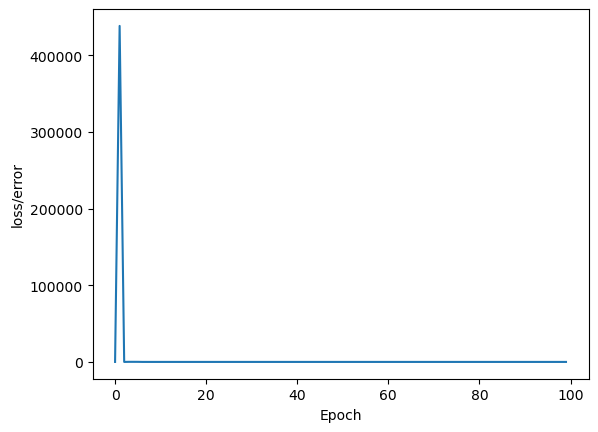

In [35]:
#Graphing the loss over iterations
plt.plot(range(epoch),losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [36]:
X_testNN = X_test.values
Y_testNN = Y_test.values

X_testNN = torch.FloatTensor(X_testNN)
Y_testNN = torch.LongTensor(Y_testNN)

In [37]:
with torch.no_grad():
    y_eval = rate.forward(X_testNN)
    loss = criterion(y_eval, Y_testNN)

In [38]:
loss

tensor(2.2747)

In [39]:
correct = 0

y_pred = list()
#y_pred = list(y_pred)


with torch.no_grad():
    for i, data in enumerate(X_testNN):
        y_val = rate.forward(data)
        
        
        y_pred.append(y_val.argmax().item())
        
        #print(f'{i+1}.) {str(y_val)}\t {Y_test[i]}\t{y_val.argmax().item()}')
        print(f'{i+1}.) {Y_testNN[i]}\t{y_val.argmax().item()}')
        
        if y_val.argmax().item() == Y_testNN[i]: 
            correct += 1

            
print(f'We got {correct} correct')
    
Y_pred = pd.DataFrame(y_pred)

#Y_pred.head()

1.) 11	13
2.) 12	13
3.) 15	13
4.) 12	13
5.) 11	13
6.) 12	13
7.) 10	13
8.) 12	13
9.) 12	13
10.) 10	13
11.) 13	13
12.) 9	13
13.) 11	13
14.) 13	13
15.) 8	13
16.) 13	13
17.) 13	13
18.) 6	13
19.) 11	13
20.) 10	13
21.) 15	13
22.) 13	13
23.) 12	13
24.) 14	13
25.) 11	13
26.) 8	13
27.) 10	13
28.) 14	13
29.) 17	13
30.) 16	13
31.) 10	13
32.) 14	13
33.) 13	13
34.) 14	13
35.) 11	13
36.) 15	13
37.) 14	13
38.) 15	13
39.) 13	13
40.) 12	13
41.) 13	13
42.) 12	13
43.) 13	13
44.) 3	13
45.) 12	13
46.) 11	13
47.) 14	13
48.) 12	13
49.) 11	13
50.) 11	13
51.) 14	13
52.) 12	13
53.) 13	13
54.) 11	13
55.) 13	13
56.) 16	13
57.) 11	13
58.) 10	13
59.) 11	13
60.) 11	13
61.) 12	13
62.) 14	13
63.) 16	13
64.) 11	13
65.) 10	13
66.) 12	13
67.) 8	13
68.) 16	13
69.) 11	13
70.) 16	13
71.) 13	13
72.) 12	13
73.) 14	13
74.) 6	13
75.) 13	13
76.) 15	13
77.) 17	13
78.) 13	13
79.) 13	13
80.) 13	13
81.) 10	13
82.) 15	13
83.) 13	13
84.) 10	13
85.) 16	13
86.) 13	13
87.) 12	13
88.) 15	13
89.) 12	13
90.) 8	13
91.) 13	13
92.) 9	13
93.) 1

734.) 13	13
735.) 10	13
736.) 6	13
737.) 10	13
738.) 15	13
739.) 9	13
740.) 14	13
741.) 10	13
742.) 9	13
743.) 10	13
744.) 12	13
745.) 13	13
746.) 12	13
747.) 14	13
748.) 9	13
749.) 14	13
750.) 14	13
751.) 10	13
752.) 13	13
753.) 14	13
754.) 11	13
755.) 12	13
756.) 11	13
757.) 12	13
758.) 11	13
759.) 10	13
760.) 14	13
761.) 13	13
762.) 14	13
763.) 16	13
764.) 15	13
765.) 9	13
766.) 13	13
767.) 12	13
768.) 9	13
769.) 12	13
770.) 13	13
771.) 16	13
772.) 14	13
773.) 13	13
774.) 15	13
775.) 14	13
776.) 15	13
777.) 15	13
778.) 12	13
779.) 13	13
780.) 13	13
781.) 12	13
782.) 7	13
783.) 14	13
784.) 10	13
785.) 10	13
786.) 14	13
787.) 11	13
788.) 12	13
789.) 17	13
790.) 14	13
791.) 8	13
792.) 10	13
793.) 12	13
794.) 7	13
795.) 15	13
796.) 7	13
797.) 6	13
798.) 15	13
799.) 15	13
800.) 16	13
801.) 13	13
802.) 10	13
803.) 12	13
804.) 9	13
805.) 5	13
806.) 12	13
807.) 14	13
808.) 13	13
809.) 15	13
810.) 11	13
811.) 8	13
812.) 14	13
813.) 13	13
814.) 9	13
815.) 10	13
816.) 10	13
817.) 10	13
818.) 1

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared: {r2}")

Mean Absolute Error: 1.905241935483871
Mean Squared Error: 6.429435483870968
R-squared: -0.1316738963857127


In [41]:
MovieData = Sample1_DF.copy()

MovieData

,title,director,cast,rating,genres,D_freq,C_freq1,C_freq2,C_freq3,G_freq1,G_freq2
0,Sankofa,[Haile Gerima],"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...",14.0,"[Dramas, Independent Movies, International Mov...",1,1,1,1,4,2
1,The Great British Baking Show,[Andy Devonshire],"[Mel Giedroyc, Sue Perkins, Mary Berry]",17.0,"[British TV Shows, Reality TV]",1,1,1,1,1,1
2,The Starling,[Theodore Melfi],"[Melissa McCarthy, Chris O'Dowd, Kevin Kline]",12.0,"[Comedies, Dramas]",1,1,1,2,4,4
3,Je Suis Karl,[Christian Schwochow],"[Luna Wedler, Jannis Niewöhner, Milan Peschel]",11.0,"[Dramas, International Movies]",1,1,1,1,4,4
4,Grown Ups,[Dennis Dugan],"[Adam Sandler, Kevin James, Chris Rock]",12.0,[Comedies],2,4,2,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...
4951,Zenda,[Avadhoot Gupte],"[Santosh Juvekar, Siddharth Chandekar, Sachit ...",14.0,"[Dramas, International Movies]",2,1,1,1,4,4
4952,Zinzana,[Majid Al Ansari],"[Ali Suliman, Saleh Bakri, Yasa]",13.0,"[Dramas, International Movies, Thrillers]",1,1,1,1,4,4
4953,Zodiac,[David Fincher],"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",15.0,"[Cult Movies, Dramas, Thrillers]",3,2,2,2,1,4
4954,Zombieland,[Ruben Fleischer],"[Jesse Eisenberg, Woody Harrelson, Emma Stone]",15.0,"[Comedies, Horror Movies]",2,2,2,2,4,2


In [42]:
train_set, test_set = tts(MovieData, test_size = 0.2)

X_train_lite = train_set.drop(['rating','title','director','cast','genres'], axis = 1)
Y_train_lite = train_set['rating']

X_test_lite = test_set.drop(['rating','title','director','cast','genres'], axis = 1)
Y_test_lite = test_set['rating']

X_lite = X_train_lite.values
Y_lite = Y_train_lite.values

X_lite = torch.FloatTensor(X_lite)
Y_lite = torch.LongTensor(Y_lite)

X_tLite = X_test_lite.values
Y_tLite = Y_test_lite.values

X_tLite = torch.FloatTensor(X_tLite)
Y_tLite = torch.LongTensor(Y_tLite)

In [43]:
#import torch.nn as nn
#import torch.nn.functional as F

#create a neural network from the pytorch module, 1 input layer, 6 hidden layer, 1 output
class RateLite(nn.Module):
    def __init__(self, predictor = 6,
                 h1 = 24, h2 = 24, h3 = 24, h4 = 22 , h5 = 22, h6 = 22, 
                 predict = 20):
        super().__init__()
        self.fc1 = nn.Linear(predictor , h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.fc4 = nn.Linear(h3, h4)
        self.fc5 = nn.Linear(h4, h5)
        self.fc6 = nn.Linear(h5, h6)
        self.out = nn.Linear(h6, predict)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        
        x = self.out(x)
        
        return x
    

rate = RateLite()

print(rate)

RateLite(
  (fc1): Linear(in_features=6, out_features=24, bias=True)
  (fc2): Linear(in_features=24, out_features=24, bias=True)
  (fc3): Linear(in_features=24, out_features=24, bias=True)
  (fc4): Linear(in_features=24, out_features=22, bias=True)
  (fc5): Linear(in_features=22, out_features=22, bias=True)
  (fc6): Linear(in_features=22, out_features=22, bias=True)
  (out): Linear(in_features=22, out_features=20, bias=True)
)


In [44]:
#Set criterion
criterion = nn.CrossEntropyLoss()

#Choose Optimizer
optimizer = torch.optim.Adam(rate.parameters(), lr=0.01)

epoch = 15
losses = []

for i in range(epoch):
    #passing inputs through the network
    y_pred = rate.forward(X_lite)
    
     #measure the loss at each iteration
    loss = criterion(y_pred,Y_lite)
   
    #keep track of progress
    losses.append(loss.detach().numpy())
    
    #print every selected interval
    if i%5 == 0:
        print(f'epoch: {i} and loss {loss}')
    
    #optimizing the model/feedback
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 and loss 3.0628488063812256
epoch: 5 and loss 2.79988956451416
epoch: 10 and loss 2.433076858520508


In [45]:
correct = 0

y_pred = list()
#y_pred = list(y_pred)


with torch.no_grad():
    for i, data in enumerate(X_tLite):
        y_val = rate.forward(data)
        
        
        y_pred.append(y_val.argmax().item())
        
        #print(f'{i+1}.) {str(y_val)}\t {Y_test[i]}\t{y_val.argmax().item()}')
        print(f'{i+1}.) {Y_tLite[i]}\t{y_val.argmax().item()}')
        
        if y_val.argmax().item() == Y_tLite[i]: 
            correct += 1

            
print(f'We got {correct} correct')
    
Y_pred = pd.DataFrame(y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_tLite, Y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_tLite, Y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(Y_tLite, Y_pred)
print(f"R-squared: {r2}")

1.) 12	12
2.) 9	12
3.) 12	12
4.) 8	12
5.) 14	12
6.) 14	12
7.) 12	12
8.) 12	12
9.) 12	12
10.) 14	12
11.) 14	12
12.) 11	12
13.) 9	12
14.) 13	12
15.) 14	12
16.) 12	12
17.) 7	12
18.) 13	12
19.) 12	12
20.) 13	12
21.) 11	12
22.) 11	12
23.) 4	12
24.) 12	12
25.) 12	12
26.) 9	12
27.) 12	12
28.) 13	12
29.) 14	12
30.) 8	12
31.) 11	12
32.) 12	12
33.) 13	12
34.) 14	12
35.) 13	12
36.) 11	12
37.) 12	12
38.) 12	12
39.) 7	12
40.) 12	12
41.) 8	12
42.) 13	12
43.) 16	12
44.) 10	12
45.) 12	12
46.) 14	12
47.) 15	12
48.) 8	12
49.) 11	12
50.) 13	12
51.) 15	12
52.) 13	12
53.) 12	12
54.) 13	12
55.) 13	12
56.) 15	12
57.) 9	12
58.) 15	12
59.) 10	12
60.) 13	12
61.) 15	12
62.) 16	12
63.) 8	12
64.) 10	12
65.) 12	12
66.) 16	12
67.) 14	12
68.) 13	12
69.) 11	12
70.) 11	12
71.) 10	12
72.) 9	12
73.) 15	12
74.) 11	12
75.) 8	12
76.) 12	12
77.) 12	12
78.) 15	12
79.) 13	12
80.) 9	12
81.) 13	12
82.) 10	12
83.) 11	12
84.) 12	12
85.) 15	12
86.) 12	12
87.) 13	12
88.) 14	12
89.) 17	12
90.) 10	12
91.) 13	12
92.) 15	12
93.) 14	12
9

In [56]:
#try Gradient Boost Model
from xgboost import XGBRegressor

# Initialize the model
xgboost=XGBRegressor(n_estimators=50)

# Fit the model
xgboost.fit(X_train_lite,Y_train_lite)
Y_pred = xgboost.predict(X_test_lite)

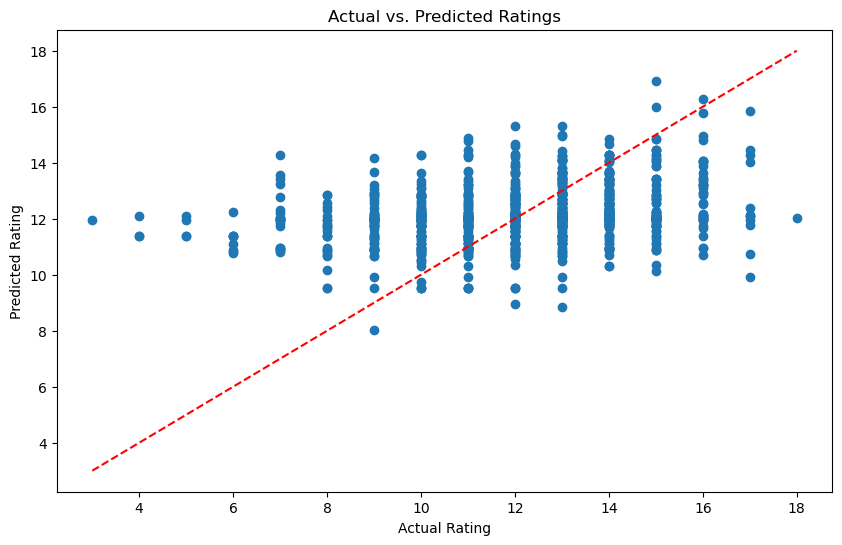

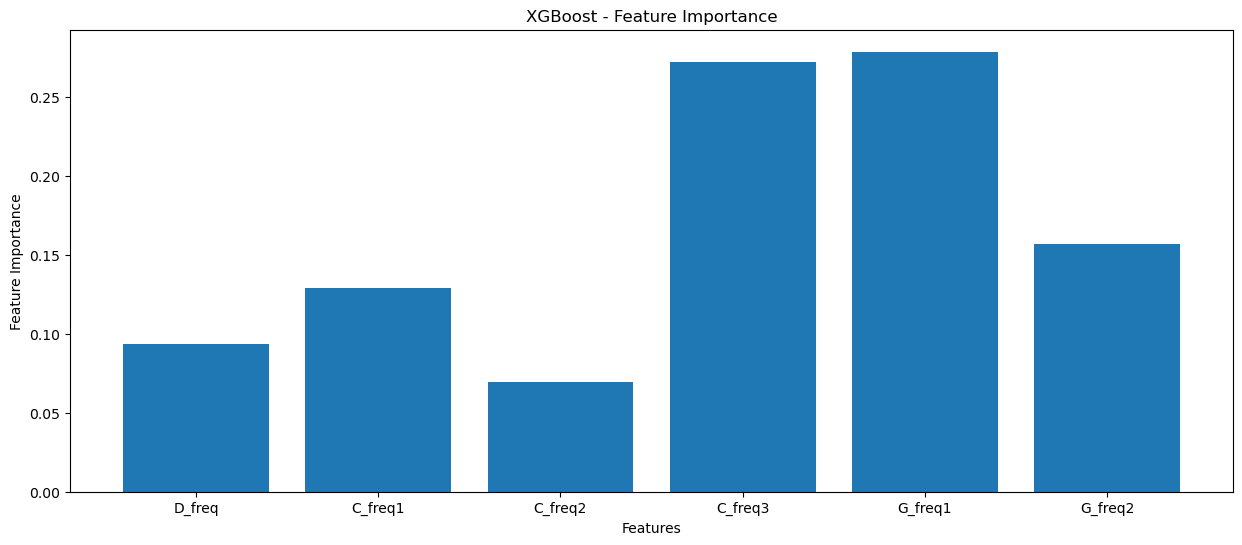

In [59]:
#scatter plot (actual vs predicted)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test_lite, Y_pred)
plt.plot([min(Y_test_lite), max(Y_test_lite)], [min(Y_test_lite), max(Y_test_lite)], '--', color='red')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')
plt.show()

# Coefficient plot
feature_importances = xgboost.feature_importances_
feature_names = X_test_lite.columns

plt.figure(figsize=(15, 6)) # Create a feature importance plot
plt.bar(feature_names, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('XGBoost - Feature Importance')
plt.xticks(rotation=0)
plt.show()

In [60]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test_lite, Y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test_lite, Y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(Y_test_lite, Y_pred)
print(f"R-squared: {r2}")

Mean Absolute Error: 1.7274888975004996
Mean Squared Error: 5.0131092710047565
R-squared: 0.05922205131119973
